In [20]:
from dotenv import load_dotenv
load_dotenv()

import os 

from langchain_groq import ChatGroq
from langgraph.graph import START,END, StateGraph
from typing_extensions import TypedDict

from IPython.display import display, Image
from langchain_community.document_loaders import YoutubeLoader



In [21]:
llm = ChatGroq(model="qwen-2.5-32b")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000019241DC0170>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000019241DC0DA0>, model_name='qwen-2.5-32b', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [23]:
class State(TypedDict):
    input_url:str
    transcript:str
    blog:str


#nodes 

def yt_transcript(state:State):
    ## url human in loop 
    """get the transcript of the url provided by the user
    """
    #url = state["input_url"]
    loader = YoutubeLoader.from_youtube_url(f"{state["input_url"]}",add_video_info = False).load()
    transcript = [doc.page_content for doc in loader]
    #state['transcript'] = transcript
    return {"transcript":transcript}
 

def blog_generate(state:State):
    """generate the blog based on transcript given
    """
    blog = llm.invoke("Generate the blog for the youtube video transcript" + f"{state['transcript']}")
    #state['blog'] = blog
    return {"blog":blog}
    



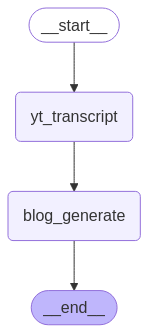

In [24]:
## build graph 

builder = StateGraph(State)

## graph nodes 
builder.add_node("yt_transcript", yt_transcript)
builder.add_node("blog_generate", blog_generate)

#graph edges 
builder.add_edge(START,"yt_transcript")
builder.add_edge("yt_transcript","blog_generate")
builder.add_edge("blog_generate",END)

#compiling 
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [25]:
url = "https://www.youtube.com/watch?v=kYpwBNljV_8"
res = graph.invoke({"input_url":url})

In [26]:
res

{'input_url': 'https://www.youtube.com/watch?v=kYpwBNljV_8',
 'transcript': ["there's something incredible about energy it's not just a concept it's the force that shapes our lives and the most powerful truth about energy is this Wherever You focus you feed if you focus on problems they grow if you focus on self-doubt it expands but if you focus on becoming better stronger wiser your entire world shifts that's not just motivation that's science that's the way the universe responds to you we live in a world that constantly demands our attention social media opinions expectations they pull us in a hundred different directions and before we know it we're drained not because we lack energy but because we're giving it away to things that don't build us think about it how much time do we spend comparing our journey to someone else's highlight reel how often do we seek validation from people who aren't even walking our path the more we do that the less we focus on what truly matters our own g

In [27]:
print(res['blog'].content)
#res["blog"].content.pretty_print()

### Title: Harnessing the Power of Energy: The Secret to Unstoppable Success

In a world where energy is a ubiquitous force, understanding how to harness and direct it can be the key to achieving unparalleled success. This principle is not just motivational; it's rooted in the very fabric of the universe. Energy is the driving force that shapes our lives, and the most powerful truth about it is this: wherever you focus, you feed. When you focus on problems, they grow; when you focus on self-doubt, it expands. Conversely, focusing on becoming better, stronger, and wiser shifts your entire world.

#### The Energy Drain of Modern Life

In today's world, we are often pulled in a hundred different directions by social media, opinions, and expectations. These external forces can drain us of our energy, leaving us feeling depleted and disconnected from our true purpose. The constant comparison to others' highlight reels and the quest for validation from those who may not understand your journ

In [19]:
from IPython.display import Markdown
Markdown(res['blog'].content)

### Blog Post: Harnessing the Power of Your Energy for Personal Transformation

In a world where social media, opinions, and external expectations dominate our daily lives, it's easy to feel overwhelmed and drained. But what if I told you that the key to success, fulfillment, and personal growth lies within your own hands? The secret is understanding and harnessing the power of your energy.

#### The Power of Focus: Feed What Matters

The concept of energy is not just a philosophical idea; it's a scientific reality that shapes our lives. The principle is simple yet profound: wherever you focus, you feed. If you focus on problems, they grow. If you focus on self-doubt, it expands. Conversely, if you focus on becoming better, stronger, and wiser, your entire world shifts. The transformation begins internally, with a shift in your mindset.

#### The Dangers of Scattering Your Energy

In today's fast-paced world, we are often pulled in a hundred different directions. Social media, the opinions of others, and the constant need for validation can drain your energy without you even realizing it. This is not just a motivational buzzword; it's a scientific fact. Your thoughts, emotions, and actions all carry energy, and the more you focus on something, the more power it gains.

Imagine your life as a garden. If you consistently water the weeds, they will take over. But if you focus on nourishing the plants you care about, they will grow stronger and more vibrant. The same principle applies to your life. When you focus on developing skills, improving your mindset, and taking consistent steps towards your goals, those areas of your life will flourish.

#### The Importance of Inward Focus

The most successful people in the world—athletes, artists, leaders—don't achieve greatness by chasing external validation. They achieve greatness by mastering themselves. They focus inward, nurturing their growth, sharpening their skills, and pushing forward with discipline and consistency. They understand that the only competition worth having is with yesterday's version of themselves.

#### Energy and Frequency: The Law of Attraction

Everything in life is energy. Your thoughts, your emotions, and your actions all carry a frequency that shapes your reality. The energy you put out into the world is the energy you get back. You can't control the external world, but you can control your focus. By focusing on growth, self-belief, and purpose, you change the frequency of your life.

#### The Shift Begins Within

The first step in harnessing your energy is to take ownership of where it goes. Are you using your energy to build yourself, or are you letting it drain away on things that don't matter? Are you focusing on your potential, or getting lost in comparison and doubt? The moment you take control of your energy, everything changes. You stop chasing and start attracting. You stop doubting and start doing.

#### Conclusion: Embrace Your Power

At the end of the day, the truth is simple: where you place your focus, you place your energy, and where you place your energy, you shape your reality. You don't need external validation or to compare your path to someone else's. You don't need to chase things that were never meant for you. What you need is to invest in yourself—your growth, your mindset, and your purpose. 

When you do, life begins to shift. You start to attract opportunities, relationships, and experiences that align with the person you are becoming. Your power has always been within you. Now is the time to own it.

---

By embracing this mindset and applying these principles, you can transform not just your life, but the world around you. The journey starts with a single step: focusing your energy on what truly matters.